In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving file1.csv to file1.csv


In [3]:
dataset = pd.read_csv('file1.csv')
dataset.head()

,Unnamed: 0,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5


In [ ]:

dataset.shape

In [5]:
dataset.isnull().sum()

Unnamed: 0         0
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [ ]:
# sns.countplot(x = 'Room_Occupancy_Count', data=dataset)


In [6]:
X = dataset.iloc[:,0:-1]
y = dataset.iloc[: , -1]

In [ ]:
ss = StandardScaler()
ss.fit_transform(X)

In [8]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [ ]:
samples

In [9]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])
     

In [10]:
def fitnessFunction(kernel, C, gamma):
  svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return accuracy_score(y_pred, y_test)

In [11]:
for i in range(len(samples)):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    X_train, X_test, y_train, y_test = samples[i]
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitnessFunction(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy = round(score, 2)
      best_C = round(C, 2)
      best_gamma = round(gamma, 2)
      best_kernel = kernel
  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]

Best Accuracy =  1.0 Best Kernel =  linear Best Nu =  5.65 Best Epsilon =  3.7
Best Accuracy =  1.0 Best Kernel =  linear Best Nu =  7.0 Best Epsilon =  6.83
Best Accuracy =  1.0 Best Kernel =  linear Best Nu =  4.85 Best Epsilon =  7.41
Best Accuracy =  1.0 Best Kernel =  linear Best Nu =  2.94 Best Epsilon =  2.26
Best Accuracy =  1.0 Best Kernel =  linear Best Nu =  3.34 Best Epsilon =  0.91
Best Accuracy =  1.0 Best Kernel =  linear Best Nu =  9.23 Best Epsilon =  5.21
Best Accuracy =  1.0 Best Kernel =  linear Best Nu =  2.62 Best Epsilon =  5.47
Best Accuracy =  1.0 Best Kernel =  linear Best Nu =  0.82 Best Epsilon =  7.27
Best Accuracy =  1.0 Best Kernel =  linear Best Nu =  3.44 Best Epsilon =  4.41
Best Accuracy =  1.0 Best Kernel =  linear Best Nu =  2.66 Best Epsilon =  1.06


In [12]:

result

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,1.0,linear,5.65,3.70
1,2,1.0,linear,7.00,6.83
2,3,1.0,linear,4.85,7.41
3,4,1.0,linear,2.94,2.26
4,5,1.0,linear,3.34,0.91
5,6,1.0,linear,9.23,5.21
6,7,1.0,linear,2.62,5.47
7,8,1.0,linear,0.82,7.27
8,9,1.0,linear,3.44,4.41
9,10,1.0,linear,2.66,1.06


In [13]:

X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]

In [14]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()], 
                                                        C=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()],
                                                        gamma=result['Best Epsilon'].iloc[result['Best Accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

In [15]:
train_sizes

array([  85,  258,  432,  605,  778,  951, 1125, 1298, 1471, 1644, 1818,
       1991, 2164, 2337, 2510, 2684, 2857, 3030, 3203, 3377, 3550, 3723,
       3896, 4070, 4243, 4416, 4589, 4762, 4936, 5109, 5282, 5455, 5629,
       5802, 5975, 6148, 6322, 6495, 6668, 6841, 7014, 7188, 7361, 7534,
       7707, 7881, 8054, 8227, 8400, 8574])

In [16]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

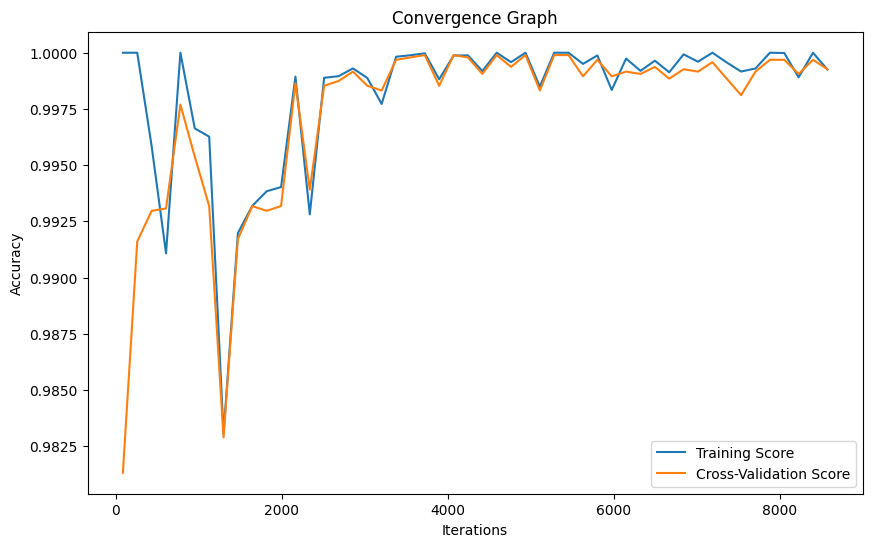

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.legend(loc="best")
plt.show()
     